#### Create a corpus of inaugural speeches of all US Presidents, available from the Miller Center's website (https://millercenter.org/the-presidency/presidential-speeches (Links to an external site.)) or from NLTK's "inaugural" corpus. If the inaugural corpus does not have President Biden's 2021 speech, you will have to add that speech to your data. Add to the corpus the year of the speech and the president’s party affiliation as: Democrat, Republican, or Other. Analyze the textual content of these speeches to answer the following questions.

1. Which president has the most vocabulary as evident from their inaugural speeches, and which presidents has the least vocabulary? On average, do Democratic, Republican, or Other presidents have higher vocabulary? (2 points)

2. Create a barplot of presidential vocabulary from the earliest president (Washington) to the latest (Trump) in chronological order. Color code this barplot as blue for Democrat, red for Republican, and gray for Others. (1 point)

3. What are the five most frequently used words (exclusive of stop words) used by each president? What are the five most frequently words used collectively by all Democratic presidents versus Republican presidents? (2 point)

4. What are the key themes (e.g., freedom, liberty, country, etc.) used by each president in their inaugural speech? (3 points)

5. Compute a sentiment (positive/negative) for each presidential speech, and draw a barplot of the sentiment of all presidential speeches in chronological order. Again, color code the speeches as blue for Democrat, red for Republican, and gray for Other. Which of these groups have higher mean sentiment score? Who are the top three presidents with the highest positive sentiment in each group? (2 points)

##### Import Packages

In [1]:
import urllib.request           # Library to fetch webpages
from bs4 import BeautifulSoup   # Library to parse data from webpages
from selenium import webdriver  # pip install selenium
from selenium.webdriver.chrome.options import  Options
import pandas as pd
import numpy as np
import time
from random import uniform
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import inaugural


##### Functions

In [2]:
def get_html(url):
    # fetch website
    driver = webdriver.Chrome('/Users/shradhayadav/Downloads/chromedriver 2')
    driver.get(url)
    # get html
    time.sleep(2)                              # Give Javascript time to rende
    soup = BeautifulSoup(driver.page_source, 'lxml', from_encoding='UTF-8')
    return soup

In [3]:
# extracting speech
def get_speech(): 
    Speech=[]
    for i in soup.find_all('div',{'class':'transcript-inner'}):
        t = i.text
        Speech.append(t)
        Speech = re.sub(r'Transcript', '', t)
        Speech = Speech.replace('\n',' ')
        return Speech


In [4]:
# def function - Appending to df1
def df_append(File_id, Speech):
    
    temp = pd.DataFrame(
        {
            'File_id' : File_id,
            'Speech' : Speech
        },index= [0]
    )

    temp
    
    return temp


##### Downloading US Presidential Inaugural Speech Corpus

In [5]:
from nltk.corpus import inaugural
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/shradhayadav/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [6]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

##### Creating Dataframe df for US presidential Speeches

In [7]:
df = pd.DataFrame()
for fileid in inaugural.fileids():
    File_id = fileid
    Speech = inaugural.raw(fileid)
    Speech = Speech.replace('\n',' ')
    temp= df_append(File_id,Speech)
    
    df = pd.concat([df,temp])

df.shape


(58, 2)

In [8]:
df.head(58)

,File_id,Speech
0,1789-Washington.txt,Fellow-Citizens of the Senate and of the House...
0,1793-Washington.txt,"Fellow citizens, I am again called upon by the..."
0,1797-Adams.txt,"When it was first perceived, in early times, t..."
0,1801-Jefferson.txt,Friends and Fellow Citizens: Called upon to u...
0,1805-Jefferson.txt,"Proceeding, fellow citizens, to that qualifica..."
0,1809-Madison.txt,Unwilling to depart from examples of the most ...
0,1813-Madison.txt,About to add the solemnity of an oath to the o...
0,1817-Monroe.txt,I should be destitute of feeling if I was not ...
0,1821-Monroe.txt,"Fellow citizens, I shall not attempt to descri..."
0,1825-Adams.txt,In compliance with an usage coeval with the ex...


##### Extract Biden's Speech from Miller's Website

In [9]:
url = 'https://millercenter.org/the-presidency/presidential-speeches/january-20-2021-inaugural-address'
# driver.get(url)
soup = get_html(url)

Speech = get_speech()


/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:221: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


#####  Appending Biden's Speech to Dataframe df

In [10]:
temp=df_append('2021-Biden.txt',Speech)
    
df = pd.concat([df,temp])

df.tail()


,File_id,Speech
0,2005-Bush.txt,"Vice President Cheney, Mr. Chief Justice, Pres..."
0,2009-Obama.txt,My fellow citizens: I stand here today humble...
0,2013-Obama.txt,Thank you. Thank you so much. Vice President ...
0,2017-Trump.txt,"Chief Justice Roberts, President Carter, Presi..."
0,2021-Biden.txt,"Chief Justice Roberts, Vice President Harris..."


##### Add Inaugral Year column in df from Id column

In [11]:
df['President_Inaugural_Year'] = df['File_id'].str.extract('(\d+)', expand=True)

##### Using kaggle dataset for US president to Party mapping - https://www.kaggle.com/harshitagpt/us-presidents

In [12]:
df_party = pd.read_csv('us_presidents_party.csv')

In [13]:
df_party.head()

,President_Inaugural_Year,president,party
0,1789,George Washington,Other
1,1797,John Adams,Other
2,1801,Thomas Jefferson,Other
3,1809,James Madison,Other
4,1817,James Monroe,Other


In [14]:
df['President_Inaugural_Year'] = df['President_Inaugural_Year'].astype(object)

In [15]:
df = df.set_index('President_Inaugural_Year')

In [16]:
df_party = df_party.set_index('President_Inaugural_Year')

In [17]:
df_party['President_Inaugural_Year'] = df_party['President_Inaugural_Year'].astype(object)

KeyError: 'President_Inaugural_Year'

In [244]:
df.dtypes

File_id                     object
Speech                      object
President_Inaugural_Year    object
dtype: object

In [238]:

dfs = [df, df_party]
cols = ['File_id','Speech','President_Inaugural_Year']
keys = ['President_Inaugural_Year', 'President_Inaugural_Year']
pd.concat(
    [df.set_index(cols).value for df in dfs],
    axis=1, keys=keys)

KeyError: "None of ['Time_start', 'Time_end', 'duration'] are in the columns"

In [237]:
dfs = df+df_party

TypeError: '<' not supported between instances of 'str' and 'int'

In [205]:
df.head(103)

,File_id,Speech,President_Inaugural_Year,president,party
0,1789-Washington.txt,Fellow-Citizens of the Senate and of the House...,1789,NaN,NaN
1,1793-Washington.txt,"Fellow citizens, I am again called upon by the...",1793,NaN,NaN
2,1797-Adams.txt,"When it was first perceived, in early times, t...",1797,NaN,NaN
3,1801-Jefferson.txt,Friends and Fellow Citizens: Called upon to u...,1801,NaN,NaN
4,1805-Jefferson.txt,"Proceeding, fellow citizens, to that qualifica...",1805,NaN,NaN
...,...,...,...,...,...
98,NaN,NaN,1989,George H. W. Bush,Republican
99,NaN,NaN,1993,Bill Clinton,Democratic
100,NaN,NaN,2001,George W. Bush,Republican
101,NaN,NaN,2009,Barack Obama,Democratic


In [ ]:
df= pd.concat([df_presidents_party,df2],axis=1)
df=df.drop(['president'], axis=1)

print(df.shape)
df.head()

In [16]:
# adding columns Inaugural year & President last name from File_id 

df1['President_Last_Name'] = df1['File_id'].str.extract('([A-Z]\w{0,})', expand=True)
df1.head()

NameError: name 'df1' is not defined

In [12]:
df1.shape

(59, 4)

In [14]:
#Fetching President Name & Inuagural Year from Web - millercenter - https://millercenter.org/president
url = 'https://millercenter.org/president'
soup = get_html(url)

President=[]
President_First_Name = []
President_Last_Name=[]
President_Inaugural_Year=[]

for i in soup.find_all('p',{'class':'views-field--title'}):
    name = i.text
    President.append(i.text)
    President_First_Name.append(name.split()[0])
    President_Last_Name.append(name.split()[-1])


for i in soup.find_all('p',{'class': 'views-field--inauguration-date'}):
    President_Inaugural_Year.append(int(i.text))
     


/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:221: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


In [19]:
# df2 - Create Dataframe for President Name & Inauguaral Year

df2=pd.DataFrame()

df2 = pd.DataFrame(list(zip(President, President_Last_Name,President_Inaugural_Year)),
                   columns=['President', 'President_Last_Name','President_Inaugural_Year'])


print(df2.shape)
df2.head()



(46, 3)


,President,President_Last_Name,President_Inaugural_Year
0,George Washington,Washington,1789
1,John Adams,Adams,1797
2,Thomas Jefferson,Jefferson,1801
3,James Madison,Madison,1809
4,James Monroe,Monroe,1817


In [22]:

df2.head(59)

,President,President_Last_Name,President_Inaugural_Year
0,George Washington,Washington,1789
1,John Adams,Adams,1797
2,Thomas Jefferson,Jefferson,1801
3,James Madison,Madison,1809
4,James Monroe,Monroe,1817
5,John Quincy Adams,Adams,1825
6,Andrew Jackson,Jackson,1829
7,Martin Van Buren,Buren,1837
8,William Harrison,Harrison,1841
9,John Tyler,Tyler,1841


### Cleaning Dataframe

In [17]:
#  Calculating President Appointed year, taking 1789 as first and 2021 as last year
def presdential_year():
    Speech_Year = []
    Speech_count = int((2025-1789)/4) #Inaugural Speech Year count

    for r in range(0,Speech_count):
        i = President_Inaugural_Year[0]
        t = int(i) + 4*r 
        Speech_Year.append(t)
    
    return Speech_Year

In [18]:
#  Finding Inaugural year missing in existing list of  dataframe df2
missing=[]
Speech_Year= presdential_year()

for i in range(len(Speech_Year)):

    if Speech_Year[i] not in President_Inaugural_Year:
        t = Speech_Year[i]
        missing.append(t)
print(missing)


[1793, 1805, 1813, 1821, 1833, 1873, 1905, 1917, 1925, 1937, 1941, 1949, 1957, 1965, 1973, 1985, 1997, 2005, 2013]


In [19]:
df.shape

(46, 4)

In [20]:
# Adding missing years in Dataframe - df2
for i in range(len(missing)):

    temp = pd.DataFrame(
            {
                'party':'',
                'President':'',
                'President_Last_Name':'',
                'President_Inaugural_Year' : missing[i]
            },index= [0])

    df = df.append(temp, ignore_index = False)


df=df.sort_values(by=['President_Inaugural_Year'])
df

,party,President,President_Last_Name,President_Inaugural_Year
0,Other,George Washington,Washington,1789
0,,,,1793
1,Other,John Adams,Adams,1797
2,Other,Thomas Jefferson,Jefferson,1801
0,,,,1805
...,...,...,...,...
0,,,,2005
43,Democratic,Barack Obama,Obama,2009
0,,,,2013
44,Republican,Donald Trump,Trump,2017


In [21]:
df.reset_index(drop=True, inplace=True) 
df

,party,President,President_Last_Name,President_Inaugural_Year
0,Other,George Washington,Washington,1789
1,,,,1793
2,Other,John Adams,Adams,1797
3,Other,Thomas Jefferson,Jefferson,1801
4,,,,1805
...,...,...,...,...
60,,,,2005
61,Democratic,Barack Obama,Obama,2009
62,,,,2013
63,Republican,Donald Trump,Trump,2017


In [22]:
# Finding Inaugural year missing in dataftrame df1 - Speeches
from collections import Counter
df1_speech_year = list(df1['President_Inaugural_Year'])
r = list(map(int,df1_speech_year))
df_speech_year= list(df['President_Inaugural_Year'])

#checking duplicate values
d = Counter(df_speech_year)
duplicates = list([item for item in d if d[item]>1])

l=[]
for i in range(len(df_speech_year)):
    if (df_speech_year[i] not in r):
        t = df_speech_year[i]
        l.append(t)

df_missing_year = list((duplicates + l))


p1=['John Tyler', 'Chester A. Arthur']
p2=[]
year1= duplicates
year2=[]

for t in l:
    a = np.where(df['President_Inaugural_Year'] == t)
    for i in a:
        x = df['President'][i]
        y = list(x)
        p2 = p2+y
        year2.append(t)
    
missing_year = year1+year2
missing_president = p1 + p2
print(missing_year)
print(missing_president)



[1841, 1881, 1850, 1923, 1963, 1974]
['John Tyler', 'Chester A. Arthur', 'Millard Fillmore', 'Calvin Coolidge', 'Lyndon B. Johnson', 'Gerald Ford']


In [23]:
missing_president_last_name=[]
for i in range(len(missing_year)):
    last_name = missing_president[i].split()[-1]
    missing_president_last_name.append(last_name)
print(missing_president_last_name)


['Tyler', 'Arthur', 'Fillmore', 'Coolidge', 'Johnson', 'Ford']


In [24]:
for i in df.index:
    
    if (df['President'][i] in missing_president) and (df['President_Inaugural_Year'][i] not in [1925,1965]):
#         print(df['President'][i])
#         print(df['President_Inaugural_Year'][i])
        df=df.drop([i],axis=0)
#     if df1['President_Last_Name'][i] in missing_president_last_name:
#         print(df1['President_Last_Name'][i])
#         print(df1['President_Inaugural_Year'][i])
# # #         df1.drop([i])

df.reset_index(drop=True, inplace=True)

        

In [25]:
# for i in df.index:
#     if (df['President_Inaugural_Year'][i] in missing and i > 0):
        
#         df['party'][i]== df['party'][i-1]
#         df['President'][i]== df['President'][i-1]
#         df['President_Last_Name'][i]== df['President_Last_Name'][i-1]


In [26]:
df

,party,President,President_Last_Name,President_Inaugural_Year
0,Other,George Washington,Washington,1789
1,,,,1793
2,Other,John Adams,Adams,1797
3,Other,Thomas Jefferson,Jefferson,1801
4,,,,1805
5,Other,James Madison,Madison,1809
6,,,,1813
7,Other,James Monroe,Monroe,1817
8,,,,1821
9,Other,John Quincy Adams,Adams,1825


In [27]:
i=[]
name1=[]

full_name_lst = list(df['President'])
last_name_lst = list(df['President_Last_Name'])
party = list(df['party'])

for i in range(len(full_name_lst)):
    if full_name_lst[i] == '':
        full_name_lst[i] = full_name_lst[i-1]
    if last_name_lst[i] == '':
        last_name_lst[i] = last_name_lst[i-1]
    if party[i] == '':
        party[i] = party[i-1]
        
df = df.drop(['party','President','President_Last_Name'],axis=1) 
df['President'] = full_name_lst
df['President_Last_Name'] = last_name_lst
df['party'] = party
df
      

,President_Inaugural_Year,President,President_Last_Name,party
0,1789,George Washington,Washington,Other
1,1793,George Washington,Washington,Other
2,1797,John Adams,Adams,Other
3,1801,Thomas Jefferson,Jefferson,Other
4,1805,Thomas Jefferson,Jefferson,Other
5,1809,James Madison,Madison,Other
6,1813,James Madison,Madison,Other
7,1817,James Monroe,Monroe,Other
8,1821,James Monroe,Monroe,Other
9,1825,John Quincy Adams,Adams,Other


In [28]:
df1['President_Inaugural_Year'] = df1['President_Inaugural_Year'].astype(int)

In [29]:
df1=df1.sort_values(by= 'President_Inaugural_Year', ascending=True)

In [30]:
df1.reset_index(drop=True, inplace=True)

In [31]:
df['President_Inaugural_Year'] = df['President_Inaugural_Year'].astype(int)

In [32]:
df=df.sort_values(by= 'President_Inaugural_Year', ascending=True)

In [33]:
df.reset_index(drop=True, inplace=True)


In [34]:
# for i in df.index:
#     if df['President_Last_Name'][i] != df1['President_Last_Name'][i]:
#         print(i)
#         print(df['President_Last_Name'][i])
#         print(df1['President_Last_Name'][i])
#         print(df1['File_id'][i])

new_df = pd.DataFrame({'President': ['Abraham Lincoln','William McKinley','Calvin Coolidge', 'Franklin D. Roosevelt','Lyndon B. Johnson']}, index=[19,28,34,39,44])
df.update(new_df)


In [35]:
df

,President_Inaugural_Year,President,President_Last_Name,party
0,1789,George Washington,Washington,Other
1,1793,George Washington,Washington,Other
2,1797,John Adams,Adams,Other
3,1801,Thomas Jefferson,Jefferson,Other
4,1805,Thomas Jefferson,Jefferson,Other
5,1809,James Madison,Madison,Other
6,1813,James Madison,Madison,Other
7,1817,James Monroe,Monroe,Other
8,1821,James Monroe,Monroe,Other
9,1825,John Quincy Adams,Adams,Other


In [36]:
df['File_id'] = df1['File_id'].values
df['Speech'] = df1['Speech'].values
df['President_Last_Name'] = df1['President_Last_Name'].values

In [511]:
# df['President_Inaugural_Year1'] = df['President_Inaugural_Year']

In [37]:
df_result = pd.DataFrame(df)
df_result

,President_Inaugural_Year,President,President_Last_Name,party,File_id,Speech
0,1789,George Washington,Washington,Other,1789-Washington.txt,Fellow-Citizens of the Senate and of the House...
1,1793,George Washington,Washington,Other,1793-Washington.txt,"Fellow citizens, I am again called upon by the..."
2,1797,John Adams,Adams,Other,1797-Adams.txt,"When it was first perceived, in early times, t..."
3,1801,Thomas Jefferson,Jefferson,Other,1801-Jefferson.txt,Friends and Fellow Citizens: Called upon to u...
4,1805,Thomas Jefferson,Jefferson,Other,1805-Jefferson.txt,"Proceeding, fellow citizens, to that qualifica..."
5,1809,James Madison,Madison,Other,1809-Madison.txt,Unwilling to depart from examples of the most ...
6,1813,James Madison,Madison,Other,1813-Madison.txt,About to add the solemnity of an oath to the o...
7,1817,James Monroe,Monroe,Other,1817-Monroe.txt,I should be destitute of feeling if I was not ...
8,1821,James Monroe,Monroe,Other,1821-Monroe.txt,"Fellow citizens, I shall not attempt to descri..."
9,1825,John Quincy Adams,Adams,Other,1825-Adams.txt,In compliance with an usage coeval with the ex...


1. Which president has the most vocabulary as evident from their inaugural speeches, and which presidents has the least vocabulary? On average, do Democratic, Republican, or Other presidents have higher vocabulary? (2 points)

2. Create a barplot of presidential vocabulary from the earliest president (Washington) to the latest (Trump) in chronological order. Color code this barplot as blue for Democrat, red for Republican, and gray for Others. (1 point)

3. What are the five most frequently used words (exclusive of stop words) used by each president? What are the five most frequently words used collectively by all Democratic presidents versus Republican presidents? (2 point)

4. What are the key themes (e.g., freedom, liberty, country, etc.) used by each president in their inaugural speech? (3 points)

5. Compute a sentiment (positive/negative) for each presidential speech, and draw a barplot of the sentiment of all presidential speeches in chronological order. Again, color code the speeches as blue for Democrat, red for Republican, and gray for Other. Which of these groups have higher mean sentiment score? Who are the top three presidents with the highest positive sentiment in each group? (2 points)

### speech text processing

In [137]:
import re            # Importing regex to clean text
from string import punctuation
import nltk
nltk.download('wordnet')
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shradhayadav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [145]:
# Defining function to clean speech text - removing punctuations, perform tokenization and lemmatization
def text_process(speech_text):
    
    speech = speech_text.strip(punctuation).lower()
    speech = re.sub(r'[!?,.\:;\n\t\--]+', '', speech)
    
    # tokenization
    word_list= nltk.tokenize.word_tokenize(speech_text)
   
    # Remove stop words from corpus
    word_list = [w for w in word_list if w not in stop_words]
  
    
    # Normalization using Lemmatization
    wordnet = nltk.stem.WordNetLemmatizer()
    lemmatized_words = [wordnet.lemmatize(w) for w in word_list]
    return lemmatized_words

In [146]:
# defining function to count number of words in speech
def word_count(word_list):
    word_count = len(set(word_list))
    return word_count 

#### 1. Which president has the most vocabulary as evident from their inaugural speeches, and which presidents has the least vocabulary? On average, do Democratic, Republican, or Other presidents have higher vocabulary?

In [147]:
# adding column for unique word count of each speech

for i in df_result.index:
    speech_text = ''
    speech_text = speech_text + df_result.loc[i, 'Speech']
#     print(speech)
    word_list = text_process(speech_text)
    df_result.loc[i,'word_count'] = word_count(word_list)
    
df_result.head()

,President_Inaugural_Year,President,President_Last_Name,party,File_id,Speech,word_count
0,1789,George Washington,Washington,Other,1789-Washington.txt,Fellow-Citizens of the Senate and of the House...,527
1,1793,George Washington,Washington,Other,1793-Washington.txt,"Fellow citizens, I am again called upon by the...",66
2,1797,John Adams,Adams,Other,1797-Adams.txt,"When it was first perceived, in early times, t...",699
3,1801,Thomas Jefferson,Jefferson,Other,1801-Jefferson.txt,Friends and Fellow Citizens: Called upon to u...,615
4,1805,Thomas Jefferson,Jefferson,Other,1805-Jefferson.txt,"Proceeding, fellow citizens, to that qualifica...",678


In [149]:
# df_result = df_result.drop(['word_count'],axis=1)
df_result.shape

(59, 7)

In [150]:
#  formatting datatype of word_count column
df_result['word_count'] = df_result['word_count'].astype(int)
df_result

,President_Inaugural_Year,President,President_Last_Name,party,File_id,Speech,word_count
0,1789,George Washington,Washington,Other,1789-Washington.txt,Fellow-Citizens of the Senate and of the House...,527
1,1793,George Washington,Washington,Other,1793-Washington.txt,"Fellow citizens, I am again called upon by the...",66
2,1797,John Adams,Adams,Other,1797-Adams.txt,"When it was first perceived, in early times, t...",699
3,1801,Thomas Jefferson,Jefferson,Other,1801-Jefferson.txt,Friends and Fellow Citizens: Called upon to u...,615
4,1805,Thomas Jefferson,Jefferson,Other,1805-Jefferson.txt,"Proceeding, fellow citizens, to that qualifica...",678
5,1809,James Madison,Madison,Other,1809-Madison.txt,Unwilling to depart from examples of the most ...,442
6,1813,James Madison,Madison,Other,1813-Madison.txt,About to add the solemnity of an oath to the o...,457
7,1817,James Monroe,Monroe,Other,1817-Monroe.txt,I should be destitute of feeling if I was not ...,906
8,1821,James Monroe,Monroe,Other,1821-Monroe.txt,"Fellow citizens, I shall not attempt to descri...",1098
9,1825,John Quincy Adams,Adams,Other,1825-Adams.txt,In compliance with an usage coeval with the ex...,863


In [151]:
# Extracting maximum vocabularies from the corpus
max_word_count = max(df_result.word_count)


most_vocab_speech = df_result.loc[df_result['word_count'] == max(df_result.word_count)]

print('President with most vocab inaugural Speech - William Harrison, having vocab -'+ str(max_word_count))
most_vocab_speech

President with most vocab inaugural Speech - William Harrison, having vocab -1667


,President_Inaugural_Year,President,President_Last_Name,party,File_id,Speech,word_count
13,1841,William Harrison,Harrison,Other,1841-Harrison.txt,Called from a retirement which I had supposed ...,1667


### President with most vocab inaugural Speech - William Harrison	Harrison,

In [152]:
# Extracting maximum vocabularies from the corpus

min_word_count = min(df_result.word_count)

least_vocab_speech = df_result.loc[df_result['word_count'] == min(df_result.word_count)]

print('President with most vocab inaugural Speech - George Washington, having vocab -'+ str(min_word_count))
least_vocab_speech

President with most vocab inaugural Speech - George Washington, having vocab -66


,President_Inaugural_Year,President,President_Last_Name,party,File_id,Speech,word_count
1,1793,George Washington,Washington,Other,1793-Washington.txt,"Fellow citizens, I am again called upon by the...",66


### President with least vocab inaugural Speech - George Washington

In [124]:
## Average vocabulary of presedential speeches by parties - Democratic, Republican

party_vocab_speech = df_result.groupby('party')['word_count'].agg(np.mean)
party_vocab_speech

party
Democratic    599.347826
Other         653.642857
Republican    702.136364
Name: word_count, dtype: float64

### On an Average Republican Presidents have higher vocabulary in Inaugural speeches.

#### 2. Create a barplot of presidential vocabulary from the earliest president (Washington) to the latest (Trump) in chronological order. Color code this barplot as blue for Democrat, red for Republican, and gray for Others.

In [125]:
df_result.head()

,President_Inaugural_Year,President,President_Last_Name,party,File_id,Speech,word_count
0,1789,George Washington,Washington,Other,1789-Washington.txt,Fellow-Citizens of the Senate and of the House...,502
1,1793,George Washington,Washington,Other,1793-Washington.txt,"Fellow citizens, I am again called upon by the...",62
2,1797,John Adams,Adams,Other,1797-Adams.txt,"When it was first perceived, in early times, t...",671
3,1801,Thomas Jefferson,Jefferson,Other,1801-Jefferson.txt,Friends and Fellow Citizens: Called upon to u...,582
4,1805,Thomas Jefferson,Jefferson,Other,1805-Jefferson.txt,"Proceeding, fellow citizens, to that qualifica...",651


In [153]:
colors = {'Democratic': 'Blue','Republican': 'Red','Other': 'Gray'}
x_label  = df_result.President.map(str) + '-' + df_result.President_Inaugural_Year.map(str)
y_label = df_result['word_count']

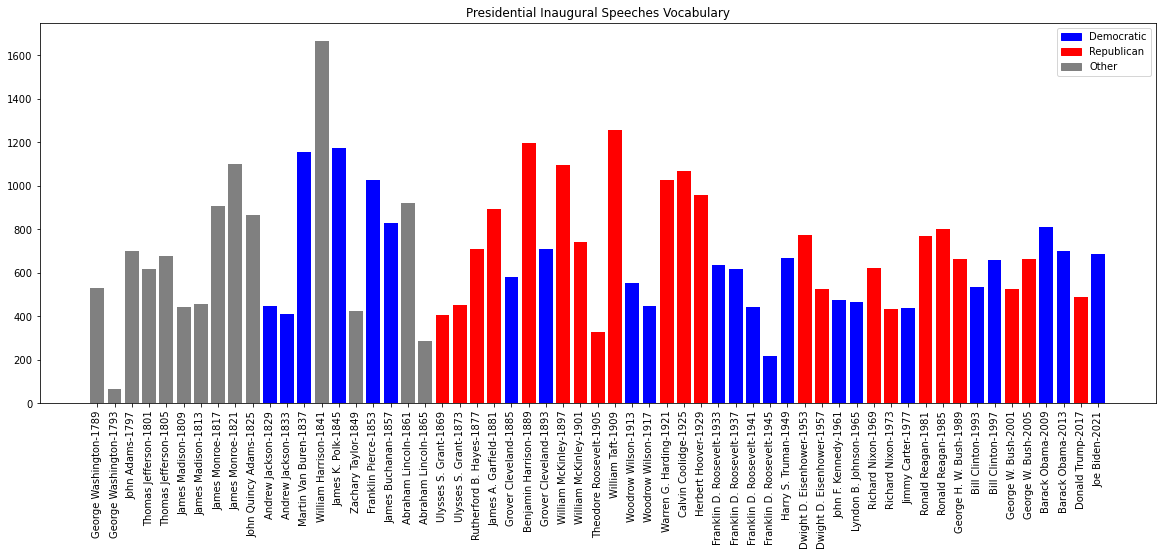

In [154]:
import matplotlib.pyplot as plot
fig, ax = plot.subplots(figsize=(20,7))
ax.bar(x_label,y_label, color = df_result['party'].map(colors))
labels = (colors.keys())
handles = [plot.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plot.legend(handles, labels)
plot.xticks(rotation = 90)
plot.title('Presidential Inaugural Speeches Vocabulary')
plot.show()

#### 3. What are the five most frequently used words (exclusive of stop words) used by each president? What are the five most frequently words used collectively by all Democratic presidents versus Republican presidents?

In [155]:
df_result.head()

,President_Inaugural_Year,President,President_Last_Name,party,File_id,Speech,word_count
0,1789,George Washington,Washington,Other,1789-Washington.txt,Fellow-Citizens of the Senate and of the House...,527
1,1793,George Washington,Washington,Other,1793-Washington.txt,"Fellow citizens, I am again called upon by the...",66
2,1797,John Adams,Adams,Other,1797-Adams.txt,"When it was first perceived, in early times, t...",699
3,1801,Thomas Jefferson,Jefferson,Other,1801-Jefferson.txt,Friends and Fellow Citizens: Called upon to u...,615
4,1805,Thomas Jefferson,Jefferson,Other,1805-Jefferson.txt,"Proceeding, fellow citizens, to that qualifica...",678


In [156]:
def freq_dict(word_list):
    dict = {}                            # Initialize dictionary
    for w in word_list:
        dict[w] = dict.get(w, 0) + 1

    # get() returns the value of a key (word) in a dictionary if it exists;
    # if the key is missing, it returns a value 0
    
    return dict

In [157]:
#we must create a dictionary with word counts for each word, and sort the dictionary by word counts
freq_list=[]
for i in df_result.index:

    speech = ''
    speech = df_result['Speech'][i]
    word_list = text_process(speech)
    print(word_list)
    dict = {} 
    for w in word_list:
        dict[w] = dict.get(w, 0) + 1
    dict
    #     d = freq_dict(word_list)
    word_freq = []
    for key, value in d.items():
        word_freq.append((value, key))
    word_freq
    word_freq.sort(reverse=True)
    word_freq

    top5_words = word_freq[0:5]
    top5_words

    freq_list.append(d)
print(freq_list)    


['Fellow-Citizens', 'Senate', 'House', 'Representatives', ':', 'Among', 'vicissitude', 'incident', 'life', 'event', 'could', 'filled', 'greater', 'anxiety', 'notification', 'transmitted', 'order', ',', 'received', '14th', 'day', 'present', 'month', '.', 'On', 'one', 'hand', ',', 'I', 'summoned', 'Country', ',', 'whose', 'voice', 'I', 'never', 'hear', 'veneration', 'love', ',', 'retreat', 'I', 'chosen', 'fondest', 'predilection', ',', ',', 'flattering', 'hope', ',', 'immutable', 'decision', ',', 'asylum', 'declining', 'year', '--', 'retreat', 'rendered', 'every', 'day', 'necessary', 'well', 'dear', 'addition', 'habit', 'inclination', ',', 'frequent', 'interruption', 'health', 'gradual', 'waste', 'committed', 'time', '.', 'On', 'hand', ',', 'magnitude', 'difficulty', 'trust', 'voice', 'country', 'called', ',', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizen', 'distrustful', 'scrutiny', 'qualification', ',', 'could', 'overwhelm', 'despondence', 'one', '(', 'inheriting', 'inferio

['Called', 'retirement', 'I', 'supposed', 'continue', 'residue', 'life', 'fill', 'chief', 'executive', 'office', 'great', 'free', 'nation', ',', 'I', 'appear', ',', 'fellow-citizens', ',', 'take', 'oath', 'Constitution', 'prescribes', 'necessary', 'qualification', 'performance', 'duty', ';', 'obedience', 'custom', 'coeval', 'Government', 'I', 'believe', 'expectation', 'I', 'proceed', 'present', 'summary', 'principle', 'govern', 'discharge', 'duty', 'I', 'shall', 'called', 'upon', 'perform', '.', 'It', 'remark', 'Roman', 'consul', 'early', 'period', 'celebrated', 'Republic', 'striking', 'contrast', 'observable', 'conduct', 'candidate', 'office', 'power', 'trust', 'obtaining', ',', 'seldom', 'carrying', 'latter', 'case', 'pledge', 'promise', 'made', 'former', '.', 'However', 'much', 'world', 'may', 'improved', 'many', 'respect', 'lapse', 'upward', 'two', 'thousand', 'year', 'since', 'remark', 'made', 'virtuous', 'indignant', 'Roman', ',', 'I', 'fear', 'strict', 'examination', 'annals', '

['Fellow-Citizens', ',', 'constitutional', 'legal', 'requirement', 'President', 'shall', 'take', 'oath', 'office', 'presence', 'people', ',', 'manifest', 'appropriateness', 'public', 'induction', 'office', 'chief', 'executive', 'officer', 'nation', 'beginning', 'Government', 'people', ',', 'whose', 'service', 'official', 'oath', 'consecrates', 'officer', ',', 'called', 'witness', 'solemn', 'ceremonial', '.', 'The', 'oath', 'taken', 'presence', 'people', 'becomes', 'mutual', 'covenant', '.', 'The', 'officer', 'covenant', 'serve', 'whole', 'body', 'people', 'faithful', 'execution', 'law', ',', 'may', 'unfailing', 'defense', 'security', 'respect', 'observe', ',', 'neither', 'wealth', ',', 'station', ',', 'power', 'combination', 'shall', 'able', 'evade', 'penalty', 'wrest', 'beneficent', 'public', 'purpose', 'serve', 'end', 'cruelty', 'selfishness', '.', 'My', 'promise', 'spoken', ';', 'unspoken', ',', 'le', 'real', 'solemn', '.', 'The', 'people', 'every', 'State', 'representative', '.', '

['My', 'Countrymen', ':', 'This', 'occasion', 'alone', 'administration', 'sacred', 'oath', 'assumed', 'American', 'citizen', '.', 'It', 'dedication', 'consecration', 'God', 'highest', 'office', 'service', 'people', '.', 'I', 'assume', 'trust', 'humility', 'knowledge', 'guidance', 'Almighty', 'Providence', 'I', 'hope', 'discharge', 'ever-increasing', 'burden', '.', 'It', 'keeping', 'tradition', 'throughout', 'history', 'I', 'express', 'simply', 'directly', 'opinion', 'I', 'hold', 'concerning', 'matter', 'present', 'importance', '.', 'OUR', 'PROGRESS', 'If', 'survey', 'situation', 'Nation', 'home', 'abroad', ',', 'find', 'many', 'satisfaction', ';', 'find', 'cause', 'concern', '.', 'We', 'emerged', 'loss', 'Great', 'War', 'reconstruction', 'following', 'increased', 'virility', 'strength', '.', 'From', 'strength', 'contributed', 'recovery', 'progress', 'world', '.', 'What', 'America', 'done', 'given', 'renewed', 'hope', 'courage', 'faith', 'government', 'people', '.', 'In', 'large', 'view

['Senator', 'Mathias', ',', 'Chief', 'Justice', 'Burger', ',', 'Vice', 'President', 'Bush', ',', 'Speaker', "O'Neill", ',', 'Senator', 'Dole', ',', 'Reverend', 'Clergy', ',', 'member', 'family', 'friend', ',', 'fellow', 'citizen', ':', 'This', 'day', 'made', 'brighter', 'presence', 'one', ',', 'time', ',', 'absent', '--', 'Senator', 'John', 'Stennis', '.', 'God', 'bless', 'welcome', 'back', '.', 'There', ',', 'however', ',', 'one', 'u', 'today', ':', 'Representative', 'Gillis', 'Long', 'Louisiana', 'left', 'u', 'last', 'night', '.', 'I', 'wonder', 'could', 'join', 'moment', 'silent', 'prayer', '.', '(', 'Moment', 'silent', 'prayer', '.', ')', 'Amen', '.', 'There', 'word', 'adequate', 'express', 'thanks', 'great', 'honor', 'bestowed', '.', 'I', 'utmost', 'deserving', 'trust', '.', 'This', ',', 'Senator', 'Mathias', 'told', 'u', ',', '50th', 'time', 'people', 'celebrated', 'historic', 'occasion', '.', 'When', 'first', 'President', ',', 'George', 'Washington', ',', 'placed', 'hand', 'upon

### 

In [158]:
party = df_result.party.unique()
for p in party:
    speech_text = df_result[(df_result.party == p)]
    text = ''
    for i in speech_text.index:
        text = text + " "+ speech_text.loc[i,'Speech']
    word = text_process(text)

    fd = nltk.FreqDist(word).most_common(5)
    print(p,fd)

Other [(',', 1904), ('.', 867), ('I', 263), (';', 191), ('The', 129)]
Democratic [(',', 2280), ('.', 1873), ('I', 285), ('people', 234), ('u', 226)]
Republican [(',', 3016), ('.', 2358), ('The', 331), ('I', 322), ('We', 315)]


### 

#### 4. What are the key themes (e.g., freedom, liberty, country, etc.) used by each president in their inaugural speech?

#### 5. Compute a sentiment (positive/negative) for each presidential speech, and draw a barplot of the sentiment of all presidential speeches in chronological order. Again, color code the speeches as blue for Democrat, red for Republican, and gray for Other. Which of these groups have higher mean sentiment score? Who are the top three presidents with the highest positive sentiment in each group

In [162]:
# importing required libraries from nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

for i in df_result.index:
    text = ""
    text = text + df_result.loc[i,'Speech']
# Sentiment Analysis using NLTK
    analyzer = SentimentIntensityAnalyzer()
    sentiment = {}
    polarity= [0]*len(text)
    text = text.strip(punctuation).lower()   
    sentiment = analyzer.polarity_scores(text)
    polarity = sentiment['compound']
    positive = sentiment['pos']
    df_result.at[i,'polarity'] = polarity
    df_result.at[i,'positive'] = positive

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shradhayadav/nltk_data...


In [164]:
df_result.head()

,President_Inaugural_Year,President,President_Last_Name,party,File_id,Speech,word_count,polarity,positive
0,1789,George Washington,Washington,Other,1789-Washington.txt,Fellow-Citizens of the Senate and of the House...,527,0.9999,0.239
1,1793,George Washington,Washington,Other,1793-Washington.txt,"Fellow citizens, I am again called upon by the...",66,0.7845,0.083
2,1797,John Adams,Adams,Other,1797-Adams.txt,"When it was first perceived, in early times, t...",699,1.0000,0.259
3,1801,Thomas Jefferson,Jefferson,Other,1801-Jefferson.txt,Friends and Fellow Citizens: Called upon to u...,615,0.9999,0.222
4,1805,Thomas Jefferson,Jefferson,Other,1805-Jefferson.txt,"Proceeding, fellow citizens, to that qualifica...",678,0.9998,0.179


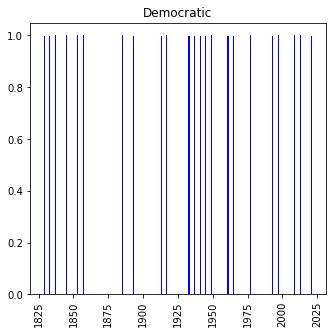

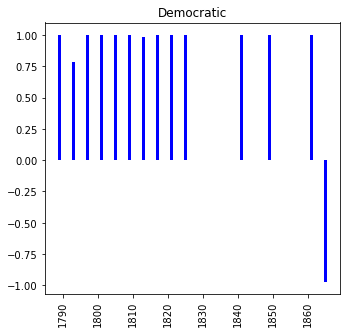

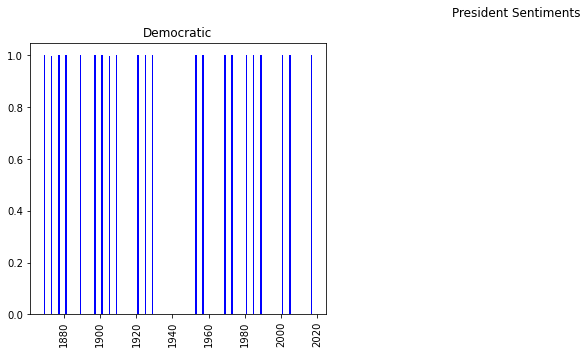

In [165]:
# barplots of sentiments of Democratic, Republican, and other presidents in chronological order

party_grp = df_result.groupby('party')

for President,group in party_grp:
    plt.figure(figsize=(18, 5))
    plt.subplot(131)
    plt.bar(group.President_Inaugural_Year, group.polarity, color = colors[name])
    plt.xticks(rotation='vertical')
    plt.title(name)

plt.suptitle('President Sentiments')
plt.show()

In [166]:
# mean sentiment score of each party
party_grp['polarity'].apply(np.mean)

party
Democratic    0.999630
Other         0.842107
Republican    0.999886
Name: polarity, dtype: float64